In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns0
import statistics as st
import math
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


In [130]:
amazon = pd.read_csv(r"C:\Users\User\Desktop\PW_Python\Assignment\EDA_DATA\amazon.csv")
amazon["discounted_price"] = pd.DataFrame(amazon["discounted_price"].str.replace("₹",""))
amazon["discounted_price"] = pd.DataFrame(amazon["discounted_price"].str.replace(",",""))
amazon["discounted_price"] = pd.to_numeric(amazon["discounted_price"])
amazon["discount_percentage"] = pd.DataFrame(amazon["discount_percentage"].str.replace("%","").astype(float))
amazon["actual_price"] = pd.DataFrame(amazon["actual_price"].str.replace("₹",""))
amazon["actual_price"] = pd.DataFrame(amazon["actual_price"].str.replace(",",""))
amazon["actual_price"] = pd.to_numeric(amazon["actual_price"])
bike = pd.read_csv(r"C:\Users\User\Desktop\PW_Python\Assignment\EDA_DATA\BIKE DETAILS.csv")
car = pd.read_csv(r"C:\Users\User\Desktop\PW_Python\Assignment\EDA_DATA\Car Sale.csv")
spotify = pd.read_csv(r"C:\Users\User\Desktop\PW_Python\Assignment\EDA_DATA\spotify.csv")

In [117]:
help(pd.DataFrame.c)

Help on function convert_dtypes in module pandas.core.generic:

convert_dtypes(self, infer_objects: 'bool_t' = True, convert_string: 'bool_t' = True, convert_integer: 'bool_t' = True, convert_boolean: 'bool_t' = True, convert_floating: 'bool_t' = True, dtype_backend: 'DtypeBackend' = 'numpy_nullable') -> 'Self'
    Convert columns to the best possible dtypes using dtypes supporting ``pd.NA``.
    
    Parameters
    ----------
    infer_objects : bool, default True
        Whether object dtypes should be converted to the best possible types.
    convert_string : bool, default True
        Whether object dtypes should be converted to ``StringDtype()``.
    convert_integer : bool, default True
        Whether, if possible, conversion can be done to integer extension types.
    convert_boolean : bool, defaults True
        Whether object dtypes should be converted to ``BooleanDtypes()``.
    convert_floating : bool, defaults True
        Whether, if possible, conversion can be done to flo

In [96]:
amazon.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149,"1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https:

In [50]:
bike.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [49]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [46]:
bike.describe()


,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
EDA - 1: Bike Details Dataset

In [ ]:
What is the range of selling prices in the dataset

In [42]:

minimum = bike["selling_price"].min()
maximum = bike["selling_price"].max()
print(minimum)
print(maximum)
print("The range in the selling prices in the dataset is from", minimum, "-", maximum)

5000
760000
The range in the selling prices in the dataset is from 5000 - 760000


In [ ]:
What is the median selling price for bikes in the dataset

In [37]:
med = bike["selling_price"].median()
print("The median selling prices for bikes in the dataset is ", med)

The median selling prices for bikes in the dataset is  45000.0


In [ ]:
What is the most common seller type

In [56]:
seller = st.mode(bike["seller_type"])
print("The most common seller type in the dataset is ", seller)

The most common seller type in the dataset is  Individual


In [ ]:
How many bikes have driven more than 50,000 kilometers

In [115]:
count = 0
#count = len(list(filter(lambda km:km>50000, bike["km_driven"])))
for km in bike["km_driven"]:
    if km >= 50000:
       count +=1
print(count)
print(count, "bikes have driven more than 50,000 kilometers") 

207
207 bikes have driven more than 50,000 kilometers


In [ ]:
What is the average km_driven value for each ownership type


In [ ]:
count = 0
for yr in bike["year"]:
    if yr >= 2015:
       count +=1
print(count)
print(count, "bikes are from the year 2015 or older")

In [ ]:
What proportion of bikes are from the year 2015 or older


In [116]:
count = 0
for yr in bike["year"]:
    if yr >= 2015:
       count +=1
print(count)
print(count, "bikes are from the year 2015 or older") 

560
560 bikes are from the year 2015 or older


In [ ]:
What is the trend of missing values across the dataset


In [65]:
bike.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
What is the highest ex_showroom_price recorded, and for which bike


In [29]:
maximum = bike["ex_showroom_price"].max()
print(maximum)

#display(bike[bike.eval("ex_showroom_price" == maximum)])

#filtered_df = bike.query('ex_showroom_price' == maximum)

filtered_df = bike[(bike["ex_showroom_price"] == bike["ex_showroom_price"].max())]
print(filtered_df)

1278000.0
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


What is the total number of bikes listed by each seller type

In [34]:
table = pd.pivot_table(bike, values='seller_type', index='name', aggfunc="count")
table

,seller_type
name,
Activa 3g,2
Activa 4g,1
Aprilia SR 125,2
BMW G310GS,1
Bajaj ct 100,1
...,...
Yamaha YZF R15 S,6
Yamaha YZF R15 V3,2
Yamaha YZF R15 [2011-2018],6


What is the relationship between selling_price and km_driven for first-owner bikes


In [38]:
bike_1 = bike[(bike["owner"] == "1st owner")]
bike_1['selling_price'].corr(bike_1['km_driven'])
#sns.pairplot(bike["ex_showroom_price"],bike["year"])

-0.2434817484496571

In [ ]:
Identify and remove outliers in the km_driven column using the IQR methodB


In [41]:
Q1 = np.percentile(bike["km_driven"], 25, interpolation = 'midpoint') 
Q2 = np.percentile(bike["km_driven"], 50, interpolation = 'midpoint') 
Q3 = np.percentile(bike["km_driven"], 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

Q1 25 percentile of the given data is,  13500.0
Q1 50 percentile of the given data is,  25000.0
Q1 75 percentile of the given data is,  43000.0
Interquartile range is 29500.0
low_limit is -30750.0
up_limit is 87250.0


In [ ]:
Perform a bivariate analysis to visualize the relationship between year and selling_price

<Axes: xlabel='year', ylabel='ex_showroom_price'>

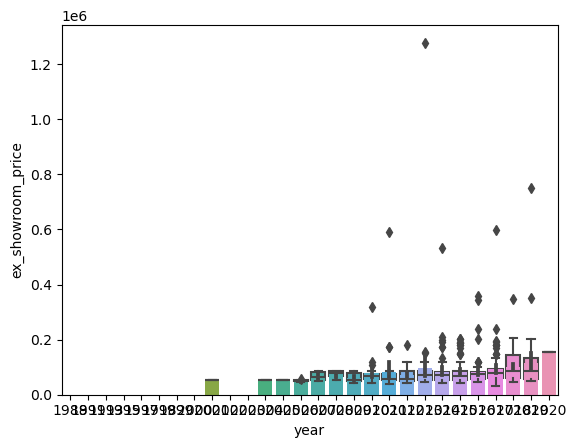

In [105]:
sns.barplot(y = "ex_showroom_price", x = "year", data = bike)
sns.boxplot(y = "ex_showroom_price", x = "year", data = bike)
#sns.violinplot(y = "ex_showroom_price", x = "year", data = bike)
#sns.stripplot(y = "ex_showroom_price", x = "year", data = bike)
#sns.swarmplot(y = "ex_showroom_price", x = "year", data = bike)

In [ ]:
What is the average depreciation in selling price based on the bike's age (current year - manufacturing 
year)

In [ ]:
Which bike names are priced significantly above the average price for their manufacturing year


In [ ]:
Develop a correlation matrix for numeric columns and visualize it using a heatmap.

<Axes: >

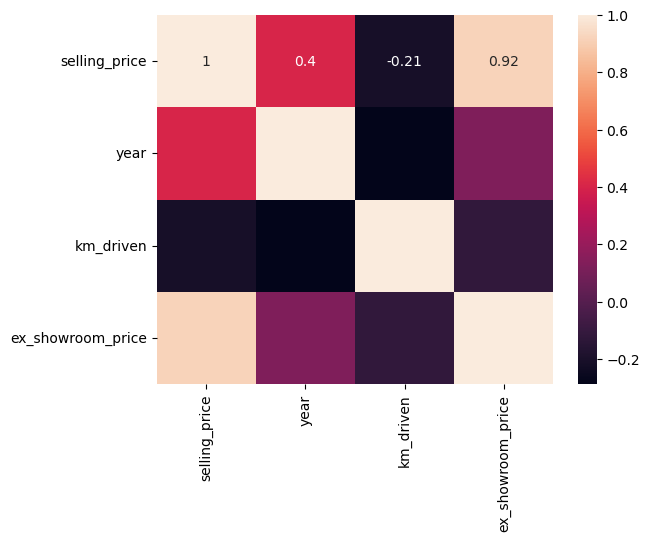

In [66]:
corr = bike.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

EDA - 2: Car Sales

In [42]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [43]:
car.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [44]:
car.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [ ]:
What is the average selling price of cars for each dealer, and how does it compare across different dealers

<Axes: xlabel='Dealer_Name', ylabel='Price ($)'>

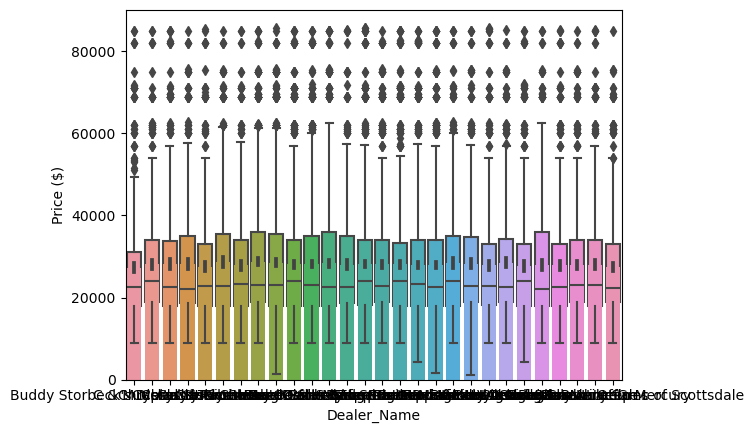

In [47]:
sns.barplot(y = "Price ($)", x = "Dealer_Name", data = car)
sns.boxplot(y = "Price ($)", x = "Dealer_Name", data = car)

In [ ]:
Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing 
trends

<Axes: xlabel='Company', ylabel='Price ($)'>

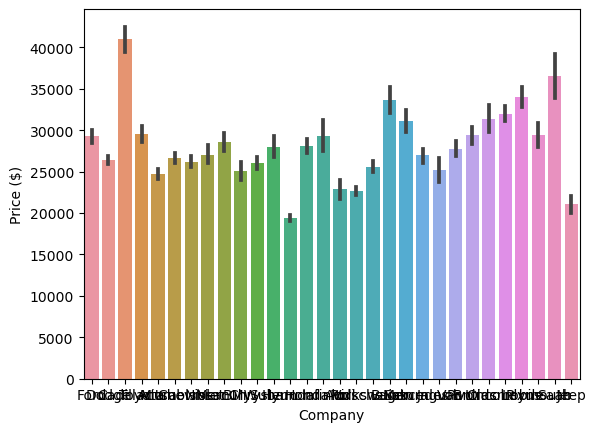

In [51]:
sns.barplot(y = "Price ($)", x = "Company", data = car)

In [ ]:
What is the distribution of car prices for each transmission type, and how do the interquartile ranges 
compare

<Axes: xlabel='Transmission', ylabel='Price ($)'>

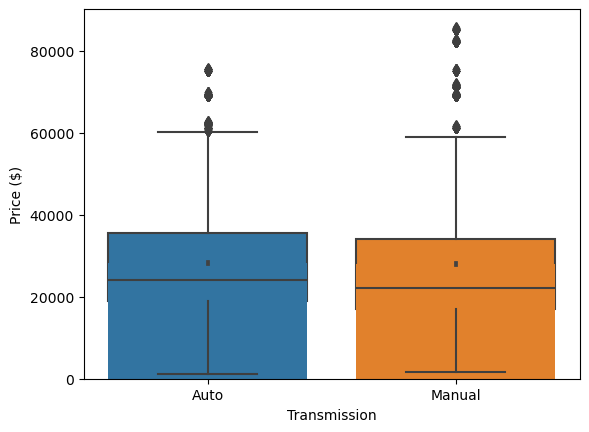

In [87]:
sns.boxplot(y = "Price ($)", x = "Transmission", data = car)
sns.barplot(y = "Price ($)", x = "Transmission", data = car)

In [ ]:
What is the distribution of car prices across different regions

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

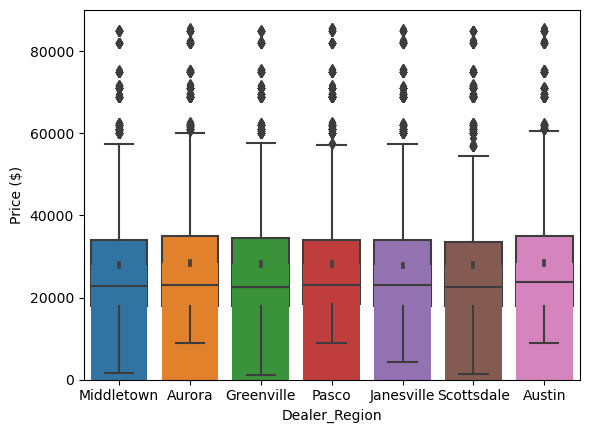

In [89]:
sns.boxplot(y = "Price ($)", x = "Dealer_Region", data = car)
sns.barplot(y = "Price ($)", x = "Dealer_Region", data = car)

In [ ]:
What is the distribution of cars based on body styles

In [91]:
sns.boxplot(y = "Model", x = "Body Style", data = car)
sns.barplot(y = "Model", x = "Body Style", data = car)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
How does the average selling price of cars vary by customer gender and annual income

In [ ]:
What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [ ]:
How does the average car price differ between cars with different engine sizes

The median selling prices for car in the dataset is  23000.0


<Axes: xlabel='Engine', ylabel='Price ($)'>

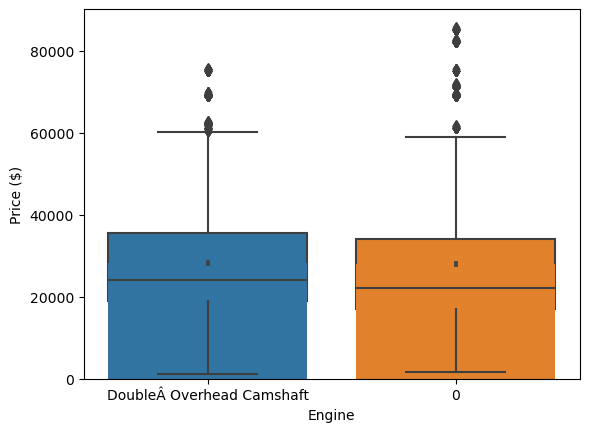

In [94]:
med = car["Price ($)"].median()
print("The median selling prices for car in the dataset is ", med)
sns.barplot(y = "Price ($)", x = "Engine", data = car)
sns.boxplot(y = "Price ($)", x = "Engine", data = car)

In [ ]:
How do car prices vary based on the customer’s annual income bracket

In [96]:
dataframe = pd.DataFrame(car, columns=['Price ($)', 'Annual Income'])
matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


In [ ]:
What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [ ]:
# Sort the rows of dataframe by 'Name' column 
rslt_df = spotify.sort_values(by = '') 
  
# show the resultant Dataframe 
rslt_df.head(5)

In [ ]:
How does car price vary with engine size across different car colors, and which colors have the highest price 
variation

In [ ]:
Is there any seasonal trend in car sales based on the date of sale

In [ ]:
How does the car price distribution change when considering different combinations of body style and 
transmission type

In [ ]:
What is the correlation between car price, engine size, and annual income of customers, and how do these 
features interact

In [84]:
car['Engine'].replace(['Overhead Camshaft', ' D*'],
                        [0, 1], inplace=True)
dataframe = pd.DataFrame(car, columns=['Price ($)', 'Engine_1', 'Annual Income'])
matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)
car.head(10)

Correlation matrix is : 
               Price ($)  Engine_1  Annual Income
Price ($)       1.000000       NaN       0.012065
Engine_1             NaN       NaN            NaN
Annual Income   0.012065       NaN       1.000000


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Engine_1
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,None
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,None
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,0,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,None
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,0,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,None
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,None
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,0,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale,None
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,0,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin,None
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin,None
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,0,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco,None
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale,None


In [ ]:
How does the average car price vary across different car models and engine types?

<Axes: xlabel='Engine', ylabel='Price ($)'>

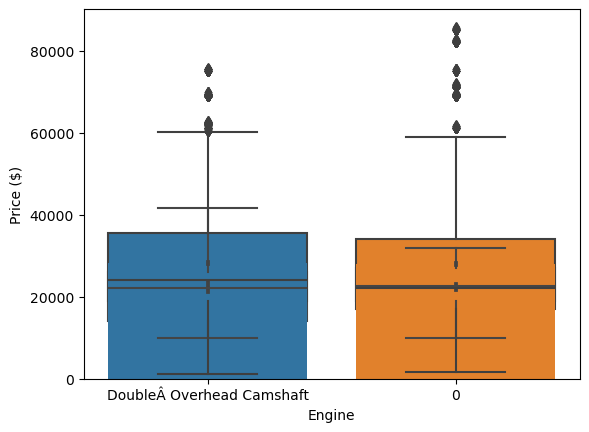

In [95]:
sns.barplot(y = "Price ($)", x = "Model", data = car)
sns.boxplot(y = "Price ($)", x = "Model", data = car)
sns.barplot(y = "Price ($)", x = "Engine", data = car)
sns.boxplot(y = "Price ($)", x = "Engine", data = car)

In [104]:
#EDA - 3: Amazon Sales Data
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
What is the average rating for each product category

<Axes: xlabel='category', ylabel='rating'>

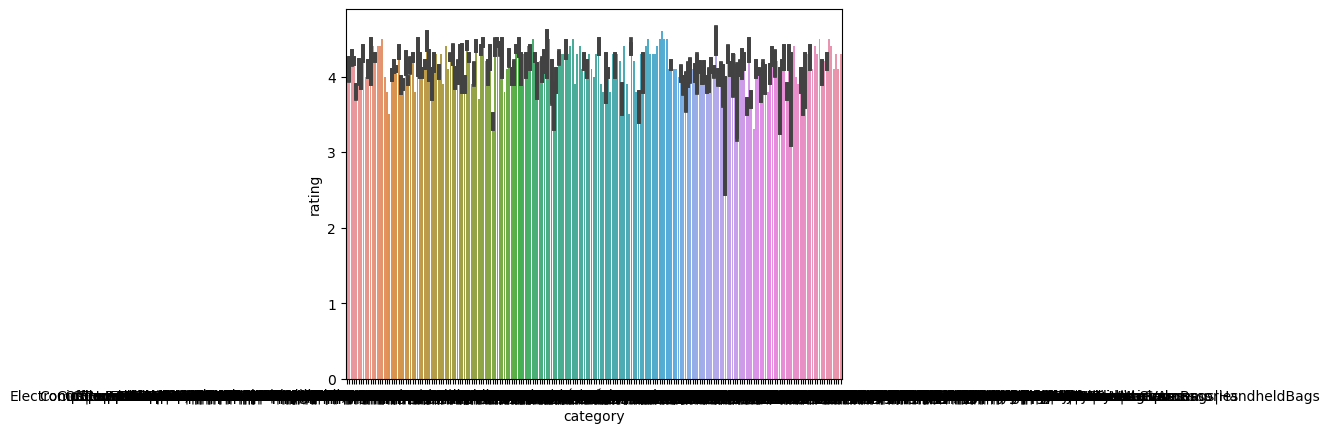

In [134]:
amazon["rating"] = pd.DataFrame(amazon["rating"].str.replace("|","0").astype(float))
#amazon["rating"] = pd.DataFrame(amazon["rating"].str.replace("|",""))
sns.barplot(y = "rating", x = "category", data = amazon)
sns.barplot(y = "rating", x = "category", data = amazon)

In [ ]:
What are the top rating_count products by category

In [ ]:
table = pd.pivot_table(bike, values='seller_type', index='name', aggfunc="count")

In [ ]:
What is the distribution of discounted prices vs. actual prices

<Axes: xlabel='actual_price', ylabel='discounted_price'>

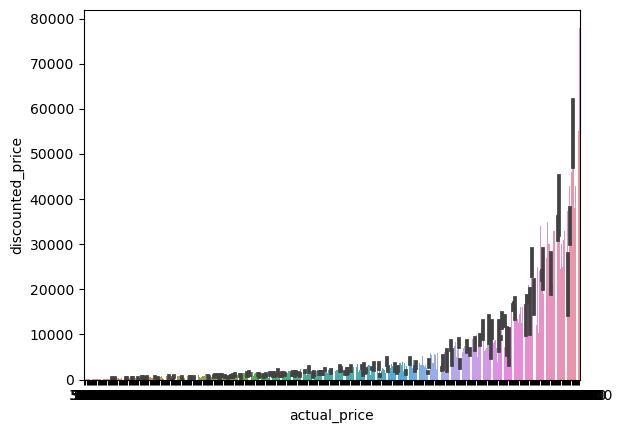

In [125]:
amazon['discounted_price'].corr(amazon['actual_price'])
sns.barplot(y = "discounted_price", x = "actual_price", data = amazon)
#sns.barplot(y = "discounted_price", x = "actual_price", data = amazon)

In [ ]:
How does the average discount percentage vary across categories

<Axes: xlabel='category', ylabel='discount_percentage'>

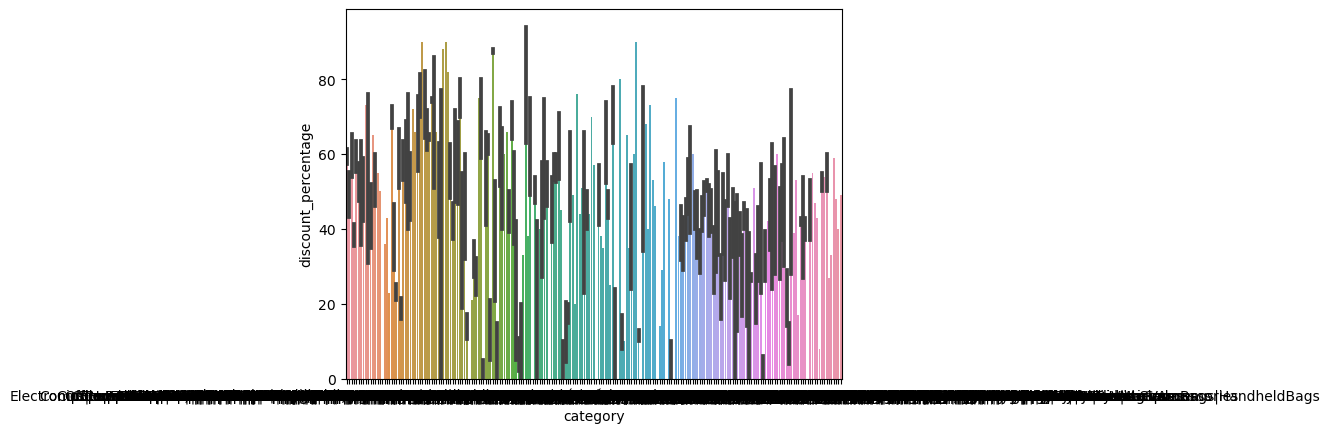

In [131]:
sns.barplot(y = "discount_percentage", x = "category", data = amazon)

In [ ]:
What are the most popular product names

In [ ]:
What are the most popular product keywords

In [ ]:
What are the most popular product reviews

In [ ]:
What is the correlation between discounted_price and rating

<Axes: >

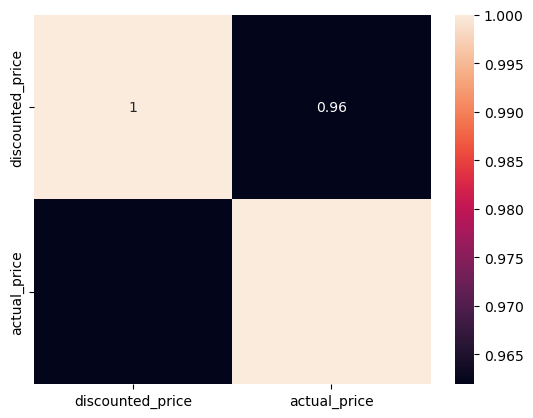

In [126]:
corr = amazon.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

In [ ]:
EDA - 4: Spotify Data:Popular Hip-Hop Artist and Tracks

In [ ]:
Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do 
the needful

In [68]:
spotify = pd.read_csv(r"C:\Users\User\Desktop\PW_Python\Assignment\EDA_DATA\spotify.csv")
spotify.info()
spotify.duplicated(subset=None, keep='first')
spotify = spotify.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [65]:
spotify.info()

<class 'pandas.core.series.Series'>
RangeIndex: 440 entries, 0 to 439
Series name: None
Non-Null Count  Dtype
--------------  -----
440 non-null    bool 
dtypes: bool(1)
memory usage: 572.0 bytes


In [ ]:
What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

<Axes: xlabel='Track Name', ylabel='Popularity'>

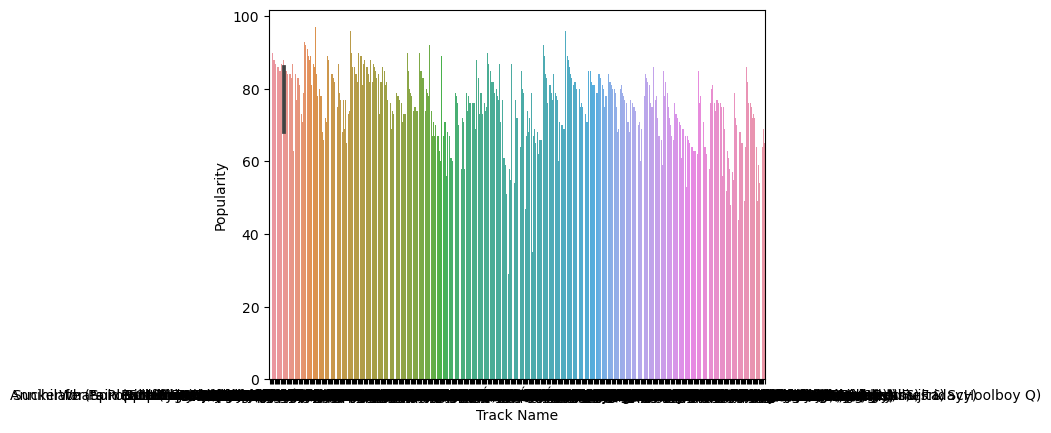

In [69]:
sns.barplot(y = "Popularity", x = "Track Name", data = spotify)

In [ ]:
Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

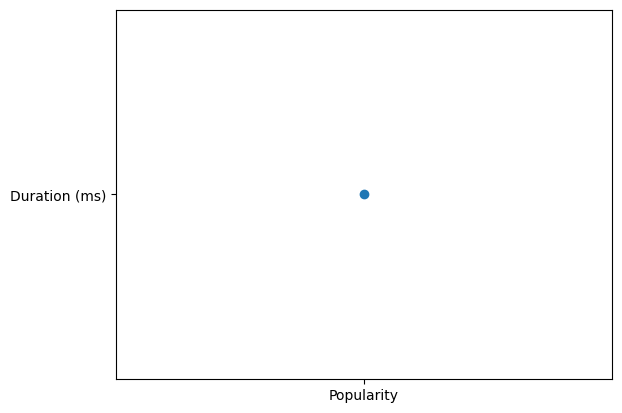

In [70]:
plt.scatter(x='Popularity', y='Duration (ms)')
plt.show()

In [ ]:
Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using 
a countplot

<Axes: xlabel='Artist', ylabel='count'>

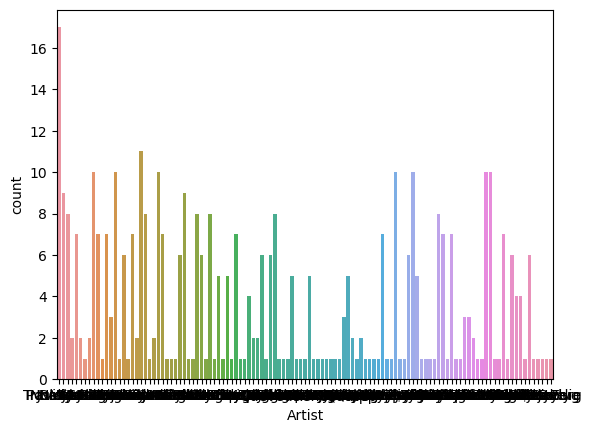

In [101]:
#help(sns.countplot)
sns.countplot(data = spotify, x = "Artist")

In [ ]:
What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [102]:
# Sort the rows of dataframe by 'Name' column 
rslt_df = spotify.sort_values(by = 'Popularity') 
  
# show the resultant Dataframe 
rslt_df.head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [ ]:
Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
display the average popularity for each artist

In [ ]:
For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [103]:
# Sort the rows of dataframe by 'Name' column 
rslt_df = spotify.sort_values(by = 'Popularity') 
  
# show the resultant Dataframe 
rslt_df.tail(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
70,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
260,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
40,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU


In [ ]:
Visualize relationships between multiple numerical variables simultaneously using a pair plot

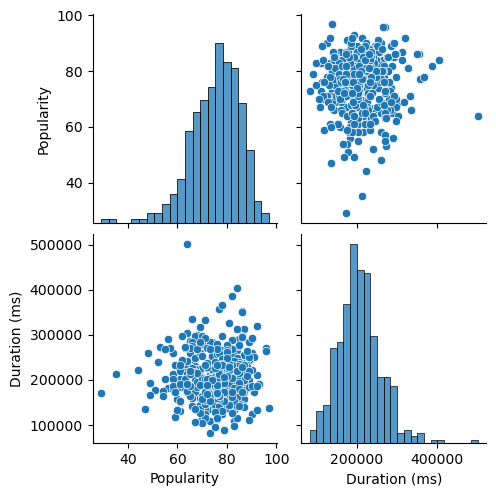

In [71]:
sns.pairplot(spotify)

In [ ]:
Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or 
violin plot

In [ ]:
sns.barplot(y = "Popularity", x = "Track Name", data = spotify)

In [ ]:
How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a 
violin plot.

<Axes: xlabel='Artist', ylabel='Popularity'>

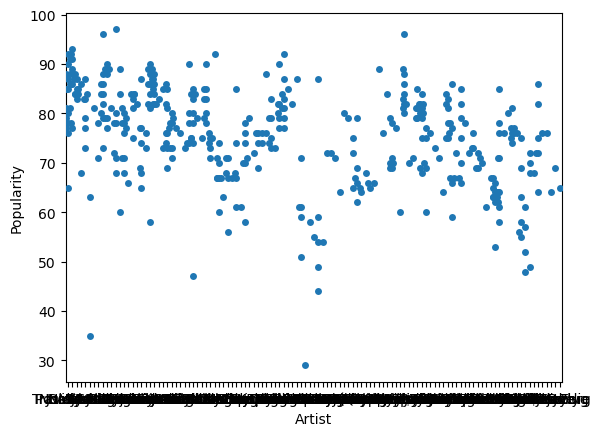

In [75]:
sns.swarmplot(y = "Popularity", x = "Artist", data = spotify)

In [72]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB
